In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analisis_por_variable import *
from analisis_descriptivo_multivariado import *
from graficos import *
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.stats import boxcox, probplot,zscore
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist


**Se trabajará con las datas previamente modificadas, con el fin de identificar relaciones entre sus respectivas variables.** 

**NOTA: La transformación de los datos correspondientes a las variables cuantitativas no cambian el comportamiento de los originales.**

In [2]:
#Importación de los datos correspondientes a las variables continuas transformadas.
continuas = pd.read_csv('/home/dalev/Escritorio/Prueba_Comfama/data/cuantitativasImput.csv')
continuas.head(15)

,promedio,promedio_establecimiento,desviacion,nivel_superior,nivel_minimo,nivel_satisfactorio,nivel_avanzado
0,286.0,2.4,58.0,51.0,28.0,15.0,6.0
1,312.0,2.4,58.0,11.0,46.0,33.0,11.0
2,292.0,3.0,50.0,21.0,48.0,23.0,9.0
3,292.0,4.9,58.0,21.0,63.0,14.0,2.0
4,265.0,3.1,51.0,39.0,44.0,12.0,6.0
5,310.0,5.0,58.0,7.0,51.0,39.0,4.0
6,259.0,2.8,42.0,45.0,39.0,16.0,0.0
7,273.0,2.7,42.0,36.0,44.0,19.0,1.0
8,273.0,5.6,50.0,35.0,61.0,2.0,2.0
9,255.0,2.6,53.0,66.0,27.0,3.0,3.0


In [3]:
continuas.shape

(2150, 7)

In [4]:
#Importación de los datos correspondientes a las variables categóricas.
categoricas = pd.read_csv('/home/dalev/Escritorio/Prueba_Comfama/data/data_Cualitativa.csv')
categoricas.head(15)

,establecimiento_educativo,sector_educativo,comuna,grado,area,numero_estudiantes_por_establecimiento
0,inst educ jose maria velaz,oficial,Santa Cruz,Quinto,matemáticas,6
1,inst educ jose maria velaz,oficial,Santa Cruz,Quinto,lenguaje,6
2,inst educ jose maria velaz,oficial,Santa Cruz,Tercero,lenguaje,6
3,inst educ jose maria velaz,oficial,Santa Cruz,Noveno,matemáticas,6
4,inst educ jose maria velaz,oficial,Santa Cruz,Tercero,matemáticas,6
5,inst educ jose maria velaz,oficial,Santa Cruz,Noveno,lenguaje,6
6,inst educ barrio santa cruz,oficial,Santa Cruz,Tercero,matemáticas,6
7,inst educ barrio santa cruz,oficial,Santa Cruz,Tercero,lenguaje,6
8,inst educ barrio santa cruz,oficial,Santa Cruz,Noveno,matemáticas,6
9,inst educ barrio santa cruz,oficial,Santa Cruz,Quinto,matemáticas,6


In [5]:
categoricas.shape

(2150, 6)

In [6]:
#Unión de los datos de las variables continuas y categóricas.
data = pd.concat([categoricas, continuas], axis=1)
data.head(15)

,establecimiento_educativo,sector_educativo,comuna,grado,area,numero_estudiantes_por_establecimiento,promedio,promedio_establecimiento,desviacion,nivel_superior,nivel_minimo,nivel_satisfactorio,nivel_avanzado
0,inst educ jose maria velaz,oficial,Santa Cruz,Quinto,matemáticas,6,286.0,2.4,58.0,51.0,28.0,15.0,6.0
1,inst educ jose maria velaz,oficial,Santa Cruz,Quinto,lenguaje,6,312.0,2.4,58.0,11.0,46.0,33.0,11.0
2,inst educ jose maria velaz,oficial,Santa Cruz,Tercero,lenguaje,6,292.0,3.0,50.0,21.0,48.0,23.0,9.0
3,inst educ jose maria velaz,oficial,Santa Cruz,Noveno,matemáticas,6,292.0,4.9,58.0,21.0,63.0,14.0,2.0
4,inst educ jose maria velaz,oficial,Santa Cruz,Tercero,matemáticas,6,265.0,3.1,51.0,39.0,44.0,12.0,6.0
5,inst educ jose maria velaz,oficial,Santa Cruz,Noveno,lenguaje,6,310.0,5.0,58.0,7.0,51.0,39.0,4.0
6,inst educ barrio santa cruz,oficial,Santa Cruz,Tercero,matemáticas,6,259.0,2.8,42.0,45.0,39.0,16.0,0.0
7,inst educ barrio santa cruz,oficial,Santa Cruz,Tercero,lenguaje,6,273.0,2.7,42.0,36.0,44.0,19.0,1.0
8,inst educ barrio santa cruz,oficial,Santa Cruz,Noveno,matemáticas,6,273.0,5.6,50.0,35.0,61.0,2.0,2.0
9,inst educ barrio santa cruz,oficial,Santa Cruz,Quinto,matemáticas,6,255.0,2.6,53.0,66.0,27.0,3.0,3.0


In [7]:
#Revisión
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   establecimiento_educativo               2150 non-null   object 
 1   sector_educativo                        2150 non-null   object 
 2   comuna                                  2150 non-null   object 
 3   grado                                   2150 non-null   object 
 4   area                                    2150 non-null   object 
 5   numero_estudiantes_por_establecimiento  2150 non-null   int64  
 6   promedio                                2150 non-null   float64
 7   promedio_establecimiento                2150 non-null   float64
 8   desviacion                              2150 non-null   float64
 9   nivel_superior                          2150 non-null   float64
 10  nivel_minimo                            2150 non-null   floa

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para la variable "promedio"</strong>
</div>

In [8]:
#Se categoriza la variable promedio en terciles.
rangos_promedios = pd.qcut(data['promedio'], 3)
rangos_promedios.value_counts()

(226.999, 295.0]    732
(295.0, 325.4]      714
(325.4, 496.0]      704
Name: promedio, dtype: int64

In [9]:
#Se genera un tabla de terciles para la variable promedio.
terciles = pd.qcut(data['promedio'], 3, labels=['Bajo', 'Medio', 'Alto']) 
terciles.value_counts()

Bajo     732
Medio    714
Alto     704
Name: promedio, dtype: int64

In [10]:
#Se agrega la variable terciles a la base de datos.
df_prom = data.copy()
df_prom['Categoria_Promedio'] = terciles
df_prom.head(15)

,establecimiento_educativo,sector_educativo,comuna,grado,area,numero_estudiantes_por_establecimiento,promedio,promedio_establecimiento,desviacion,nivel_superior,nivel_minimo,nivel_satisfactorio,nivel_avanzado,Categoria_Promedio
0,inst educ jose maria velaz,oficial,Santa Cruz,Quinto,matemáticas,6,286.0,2.4,58.0,51.0,28.0,15.0,6.0,Bajo
1,inst educ jose maria velaz,oficial,Santa Cruz,Quinto,lenguaje,6,312.0,2.4,58.0,11.0,46.0,33.0,11.0,Medio
2,inst educ jose maria velaz,oficial,Santa Cruz,Tercero,lenguaje,6,292.0,3.0,50.0,21.0,48.0,23.0,9.0,Bajo
3,inst educ jose maria velaz,oficial,Santa Cruz,Noveno,matemáticas,6,292.0,4.9,58.0,21.0,63.0,14.0,2.0,Bajo
4,inst educ jose maria velaz,oficial,Santa Cruz,Tercero,matemáticas,6,265.0,3.1,51.0,39.0,44.0,12.0,6.0,Bajo
5,inst educ jose maria velaz,oficial,Santa Cruz,Noveno,lenguaje,6,310.0,5.0,58.0,7.0,51.0,39.0,4.0,Medio
6,inst educ barrio santa cruz,oficial,Santa Cruz,Tercero,matemáticas,6,259.0,2.8,42.0,45.0,39.0,16.0,0.0,Bajo
7,inst educ barrio santa cruz,oficial,Santa Cruz,Tercero,lenguaje,6,273.0,2.7,42.0,36.0,44.0,19.0,1.0,Bajo
8,inst educ barrio santa cruz,oficial,Santa Cruz,Noveno,matemáticas,6,273.0,5.6,50.0,35.0,61.0,2.0,2.0,Bajo
9,inst educ barrio santa cruz,oficial,Santa Cruz,Quinto,matemáticas,6,255.0,2.6,53.0,66.0,27.0,3.0,3.0,Bajo


In [11]:
df_prom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   establecimiento_educativo               2150 non-null   object  
 1   sector_educativo                        2150 non-null   object  
 2   comuna                                  2150 non-null   object  
 3   grado                                   2150 non-null   object  
 4   area                                    2150 non-null   object  
 5   numero_estudiantes_por_establecimiento  2150 non-null   int64   
 6   promedio                                2150 non-null   float64 
 7   promedio_establecimiento                2150 non-null   float64 
 8   desviacion                              2150 non-null   float64 
 9   nivel_superior                          2150 non-null   float64 
 10  nivel_minimo                            2150 non

<div style="text-align: center; font-size: 24px;">
    <strong>Tablas de Contingencia</strong>
</div>

In [44]:
#Tabla de contingencia entre la variable terciles y la variable sector_educativo.
tabla_terciles_sector = pd.crosstab(index=df_prom['Categoria_Promedio'], columns=df_prom['sector_educativo'], margins=True)
tabla_terciles_sector

sector_educativo,oficial,contratacion,privado,All
Categoria_Promedio,,,,
Bajo,671,32,29,732
Medio,517,75,122,714
Alto,152,93,459,704
All,1340,200,610,2150


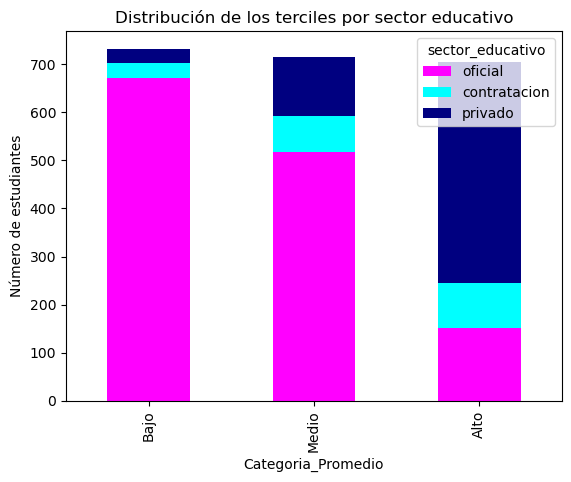

In [45]:
#Visualización gráfica de la tabla de contingencia.
tabla_terciles_sector = tabla_terciles_sector.drop('All', axis=1)
tabla_terciles_sector = tabla_terciles_sector.drop('All', axis=0)
tabla_terciles_sector.plot(kind='bar', stacked=True, color=['#FF00FF', '#00FFFF', '#000080'])
plt.title('Distribución de los terciles por sector educativo')
plt.ylabel('Número de estudiantes')
plt.show()

In [14]:
#Tabla de contingencia entre la variable terciles y la variable area.
tabla_terciles_area = pd.crosstab(index=df_prom['Categoria_Promedio'], columns=df_prom['area'], margins=True)
tabla_terciles_area

area,lenguaje,matemáticas,All
Categoria_Promedio,,,
Bajo,235,497,732
Medio,414,300,714
Alto,426,278,704
All,1075,1075,2150


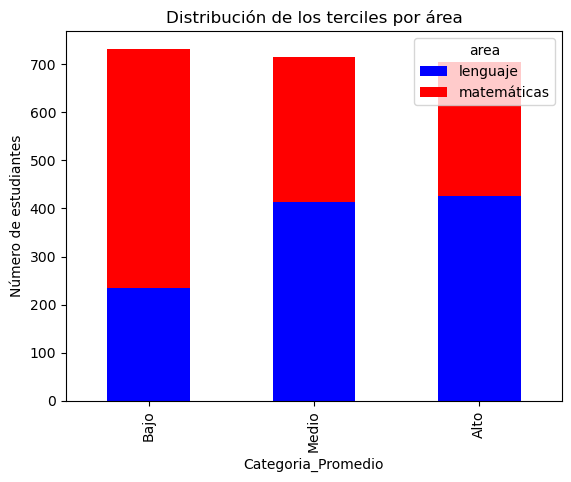

In [15]:
#Visualización gráfica de la tabla de contingencia.
tabla_terciles_area = tabla_terciles_area.drop('All', axis=1)
tabla_terciles_area = tabla_terciles_area.drop('All', axis=0)
tabla_terciles_area.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'])
plt.title('Distribución de los terciles por área')
plt.ylabel('Número de estudiantes')
plt.show()

In [16]:
#Tabla de contingencia entre la variable Categoria_Promedio y la variable grado.
tabla_terciles_grado = pd.crosstab(index=df_prom['Categoria_Promedio'], columns=df_prom['grado'], margins=True)
tabla_terciles_grado

grado,Noveno,Quinto,Tercero,All
Categoria_Promedio,,,,
Bajo,177,303,252,732
Medio,244,223,247,714
Alto,245,214,245,704
All,666,740,744,2150


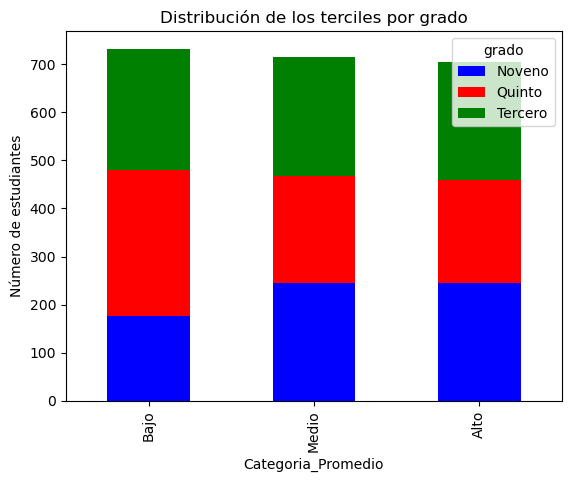

In [17]:
#Visualización gráfica de la tabla de contingencia.
tabla_terciles_grado = tabla_terciles_grado.drop('All', axis=1)
tabla_terciles_grado = tabla_terciles_grado.drop('All', axis=0)
tabla_terciles_grado.plot(kind='bar', stacked=True, color=['blue', 'red', 'green', 'yellow'])
plt.title('Distribución de los terciles por grado')
plt.ylabel('Número de estudiantes')
plt.show()


In [18]:
#Tabla de contingencia entre la variable Categoria_Promedio y la variable comuna.
tabla_terciles_comuna = pd.crosstab(index= df_prom['comuna'], columns=df_prom['Categoria_Promedio'], margins=True)
tabla_terciles_comuna

Categoria_Promedio,Bajo,Medio,Alto,All
comuna,,,,
Altavista,18,8,2,28
Aranjuez,44,63,47,154
Belén,44,31,71,146
Buenos Aires,29,44,57,130
Castilla,45,68,39,152
Doce de Octubre,59,49,18,126
El Poblado,7,18,101,126
Guayabal,14,24,22,60
La América,26,44,52,122


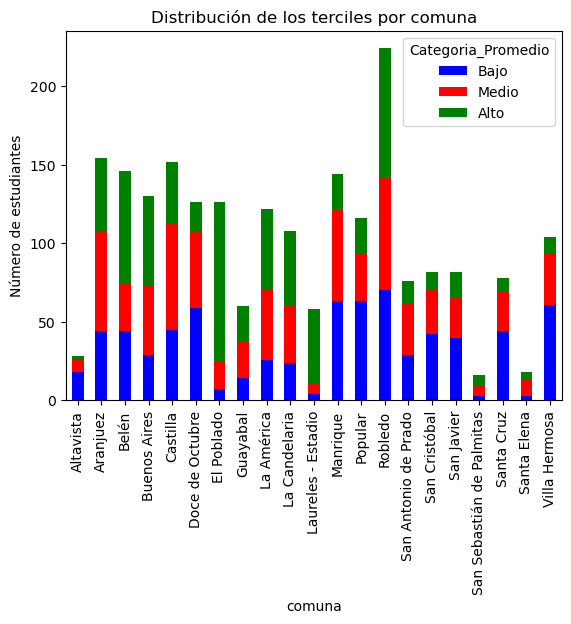

In [19]:
#Visualización gráfica de la tabla de contingencia.
tabla_terciles_comuna = tabla_terciles_comuna.drop('All', axis=1)
tabla_terciles_comuna = tabla_terciles_comuna.drop('All', axis=0)
tabla_terciles_comuna.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'])
plt.title('Distribución de los terciles por comuna')
plt.ylabel('Número de estudiantes')
plt.show()

<div style="text-align: center; font-size: 24px;">
    <strong>Modelamiento</strong>
</div>

Se utilizará una regresión logística multinomial con el fin de determinar la relación entre el Sector Educativo (Privado, Oficial, Contratación) y la categorización por rangos de los promedios de cada estudiante (Bajo, Medio y Alto), donde:

* Bajo: (226.999, 295.0]
* Medio: (295.0, 325.4] 
* Alto: (325.4, 496.0] 

Para ello, se plantea la siguiente prueba de hipótesis:

* H0: El sector educativo no tiene influencia en la categorización del promedio.
* Ha: El sector educativo tiene influencia en la categorización del promedio.

In [20]:
import statsmodels.api as sm

#Aseguramos que Categoria_Promedio sea categórica
df_prom['Categoria_Promedio'] = pd.Categorical(
    df_prom['Categoria_Promedio'], 
    categories=['Bajo', 'Medio', 'Alto'], 
    ordered=True
)

df_prom['sector_educativo'] = pd.Categorical(df_prom['sector_educativo'], categories=['oficial', 'contratacion', 'privado'])

#Crear variables dummy para sector_educativo
df = pd.get_dummies(df_prom, columns=['sector_educativo'], drop_first=False)

#Mostrar las columnas creadas
print("Columnas después del One-Hot Encoding:")
print(df.columns)

#Seleccionar las variables independientes (Privado y Contratación)
X = df[['sector_educativo_privado', 'sector_educativo_contratacion']]

# Agregar constante al modelo (intercepto)
X = sm.add_constant(X)

# Variable dependiente
y = df['Categoria_Promedio']

# Ajustar el modelo de regresión logística multinomial
modelo = sm.MNLogit(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# Calcular Odds Ratios para interpretar los coeficientes
odds_ratios = np.exp(modelo.params)
print("\nOdds Ratios:")
print(odds_ratios)


Columnas después del One-Hot Encoding:
Index(['establecimiento_educativo', 'comuna', 'grado', 'area',
       'numero_estudiantes_por_establecimiento', 'promedio',
       'promedio_establecimiento', 'desviacion', 'nivel_superior',
       'nivel_minimo', 'nivel_satisfactorio', 'nivel_avanzado',
       'Categoria_Promedio', 'sector_educativo_oficial',
       'sector_educativo_contratacion', 'sector_educativo_privado'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.886497
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:     Categoria_Promedio   No. Observations:                 2150
Model:                        MNLogit   Df Residuals:                     2144
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1930
Time:                        18:36:56   Log-Likelihood:      

**Interpretación:**

* Categoria_Promedio = Medio

    Intercepto: El coeficiente es -0.2607, lo que implica una disminución en las probabilidades de estar en la categoría "Medio" frente a "Bajo" cuando todas las demás variables están en cero (referencia del sector oficial).

    Sector Educativo Privado:

    * Coeficiente: 1.6975. Esto significa que los estudiantes del sector privado tienen una mayor probabilidad de estar en la categoría "Medio" en comparación con * "Bajo" que los del sector oficial.
  
    * Razón de probabilidades (odds ratio): 5.46. Los estudiantes del sector privado tienen 5.46 veces más probabilidades de estar en "Medio" frente a "Bajo", en comparación con el sector oficial.

    Sector Educativo Contratación:

    * Coeficiente: 1.1125. Los estudiantes de este sector también tienen mayores probabilidades de estar en "Medio" frente a "Bajo".
  
    * Razón de probabilidades: 3.04. Los estudiantes de contratación tienen 3.04 veces más probabilidades de estar en "Medio" frente a "Bajo".

* Categoria_Promedio = Alto

    Intercepto: Coeficiente de -1.4849, lo que indica menores probabilidades de estar en la categoría "Alto" frente a "Bajo" cuando todas las variables están en cero.

    Sector Educativo Privado:

    * Coeficiente: 4.2466. Este valor sugiere un incremento muy significativo en las probabilidades de pertenecer a la categoría "Alto" frente a "Bajo".

    * Razón de probabilidades: 69.87. Los estudiantes del sector privado tienen 69.87 veces más probabilidades de estar en "Alto" frente a "Bajo".
    
    Sector Educativo Contratación:
    
    * Coeficiente: 2.5518. Los estudiantes de este sector también tienen una mayor probabilidad de estar en "Alto" frente a "Bajo".
       
    * Razón de probabilidades: 12.83. Los estudiantes de contratación tienen 12.83 veces más probabilidades de estar en "Alto" frente a "Bajo".

**Observación:** Todos los coeficientes son estadísticamente significativos (p < 0.05), lo que implica que las variables explicativas tienen un efecto real sobre las probabilidades de clasificación en las categorías "Medio" y "Alto".